# **PCA and t-SNE Project: Auto MPG**

# **Marks: 30**

Welcome to the project on PCA and t-SNE. In this project, we will be using the auto-mpg dataset.


-----------------------------
## **Context**
-----------------------------

The shifting market conditions, globalization, cost pressure, and volatility are leading to a change in the automobile market landscape. The emergence of data, in conjunction with machine learning in automobile companies, has paved a way that is helping bring operational and business transformations.

The automobile market is vast and diverse, with numerous vehicle categories being manufactured and sold with varying configurations of attributes such as displacement, horsepower, and acceleration. We aim to find combinations of these features that can clearly distinguish certain groups of automobiles from others through this analysis, as this will inform other downstream processes for any organization aiming to sell each group of vehicles to a slightly different target audience.

You are a Data Scientist at SecondLife which is a leading used car dealership with numerous outlets across the US. Recently, they have started shifting their focus to vintage cars and have been diligently collecting data about all the vintage cars they have sold over the years. The Director of Operations at SecondLife wants to leverage the data to extract insights about the cars and find different groups of vintage cars to target the audience more efficiently.

-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset** 
-----------------------------
There are 8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Importing the necessary libraries and overview of the dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


### **Loading the data**

In [2]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


### **Data Overview**

- Observations
- Sanity checks




In [3]:
df.shape

(398, 8)

In [4]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000


In [5]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
car name         object
dtype: object

The issue is that the 'horsepower' field is formatted as a string rather than an integer.

In [6]:
df.isna().sum() 

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
car name        0
dtype: int64

The dataset does not contain any missing values.

In [7]:
df.isnull().sum() 

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
car name        0
dtype: int64

The dataset does not contain any null values.

## **Data Preprocessing and Exploratory Data Analysis**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- Missing value treatment
- Feature engineering (if needed)
- Check the correlation among the variables
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)



In [8]:
df['car name'].nunique()

305

305 out of 398 values are unique in 'car name' column. 

In [9]:
data1 = df.copy()

data1 = data1.drop(['car name'], axis = 1)



In [10]:
data1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


We can drop the 'car name' column since it doesnt add any value. 

In [11]:
digit = pd.DataFrame(data1.horsepower.str.isdigit())  

data1[digit['horsepower'] == False]   

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


In the dataset, there are six instances where the 'horsepower' field is marked as '?', which can be regarded as missing values. To address this, we should first substitute '?' with 'np.nan'. Following this, we can impute these missing values and convert the data type of the 'horsepower' column accordingly.

In [12]:
data1 = data1.replace('?', np.nan)

data1[digit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [13]:
data1.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
dtype: int64

In [14]:
data1.horsepower.fillna(data1.horsepower.median(), inplace = True)

data1['horsepower'] = data1['horsepower'].astype('float64')

We fill the missing values with median values.

In [15]:
data1.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
dtype: int64

### **Summary Statistics**

Text(0.5, 1.0, 'Count of cylinders')

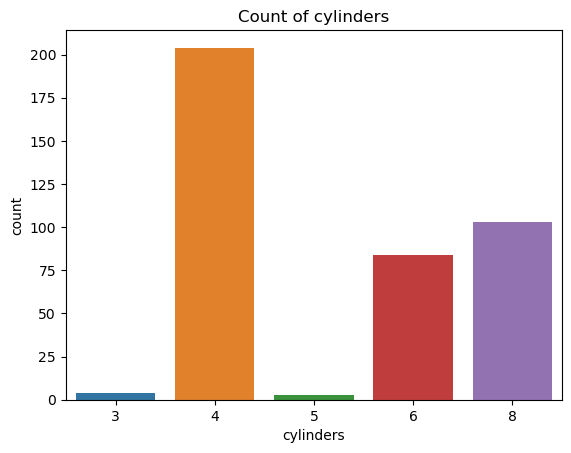

In [16]:
sns.countplot(data=data1, x='cylinders')
plt.title('Count of cylinders')

1)4th cylinder 2)8th cylinder 3)6th cylinder ...


Text(0.5, 1.0, 'Count of vehicles per model year')

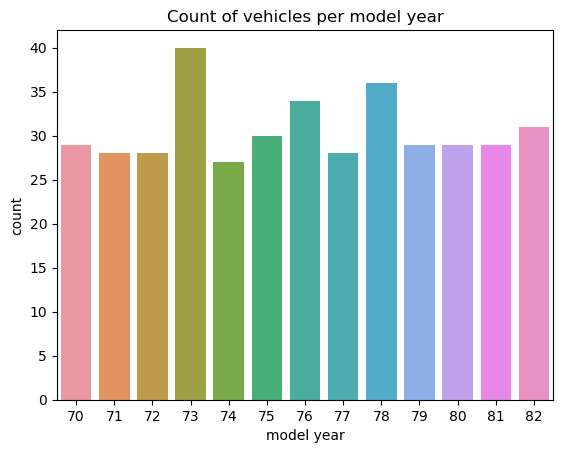

In [17]:
sns.countplot(data=data1, x='model year')
plt.title('Count of vehicles per model year')

 Most models from 1970 - 1980.

In [18]:
def boxplot(v, d, c, df):
    fig, axes = plt.subplots(1, 3, figsize=(12, 2)) 


    sns.boxplot(data=df, x=v, ax=axes[0])
    axes[0].set_title(f'Boxplot of {v}')

   
    sns.boxplot(data=df, x=d, ax=axes[1])
    axes[1].set_title(f'Boxplot of {d}')

 
    sns.boxplot(data=df, x=c, ax=axes[2])
    axes[2].set_title(f'Boxplot of {c}')
    
    

    plt.tight_layout()
    plt.show()

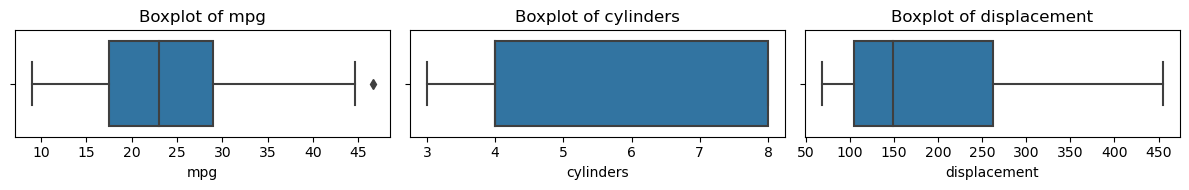

In [19]:
boxplot('mpg','cylinders','displacement', data1)

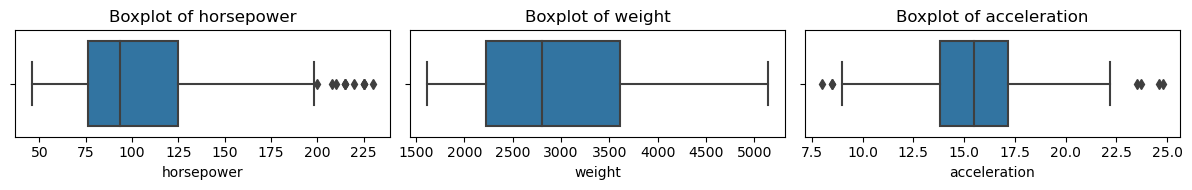

In [20]:
boxplot('horsepower','weight','acceleration', data1)

Text(0.5, 1.0, 'Horsepower to cylinders')

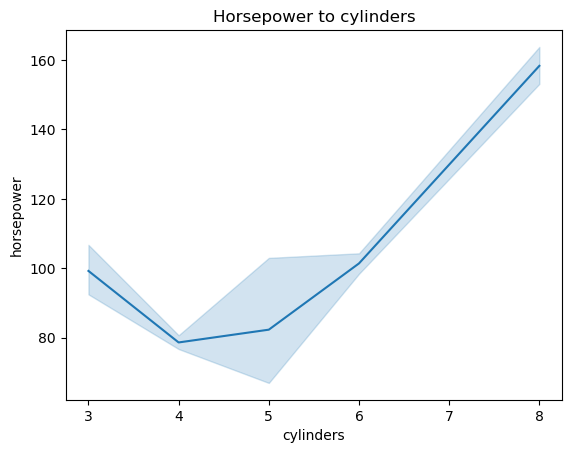

In [21]:
sns.lineplot(data=data1, x='cylinders', y='horsepower')
plt.title('Horsepower to cylinders')

There is a positive correlation between the number of cylinders and the amount of horsepower.

Text(0.5, 1.0, 'Horsepower to acceleration')

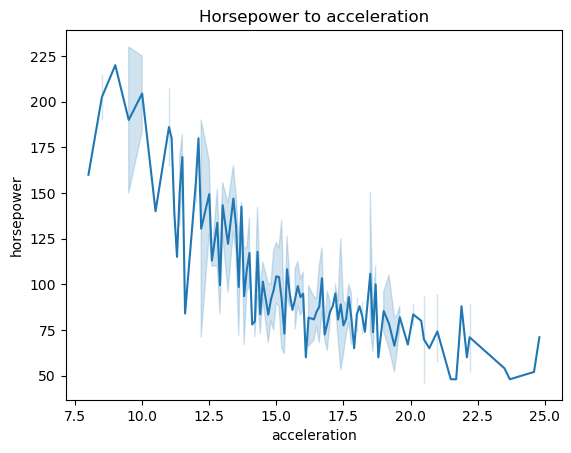

In [22]:
sns.lineplot(data=data1, x='acceleration', y='horsepower')
plt.title('Horsepower to acceleration')

There is a negative correlation between the time of acceleration from 0-60mph and the amount of horsepowers.

Text(0.5, 1.0, 'Mpg to model year')

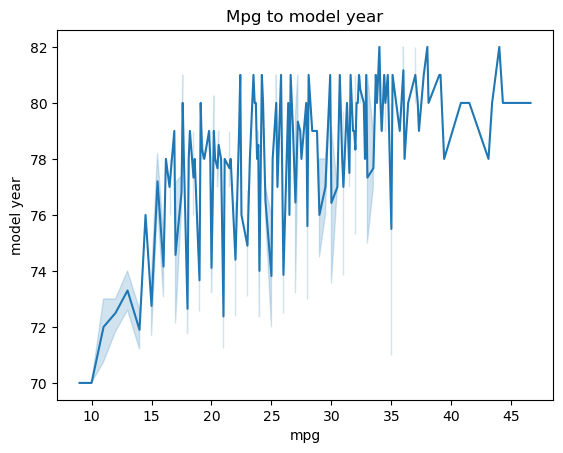

In [23]:
sns.lineplot(data=data1, x='mpg', y='model year')
plt.title('Mpg to model year')

There is a positive correlation between the year of model and miles per gallon.

Text(0.5, 1.0, 'Weight to horsepower')

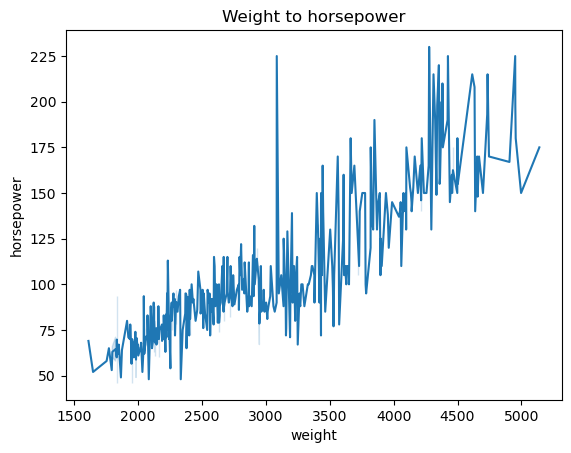

In [24]:
sns.lineplot(data=data1, x='weight', y='horsepower')
plt.title('Weight to horsepower')

There is a positive correlation between the year of weight and the acceleration.

Text(0.5, 1.0, 'Weight to mpg')

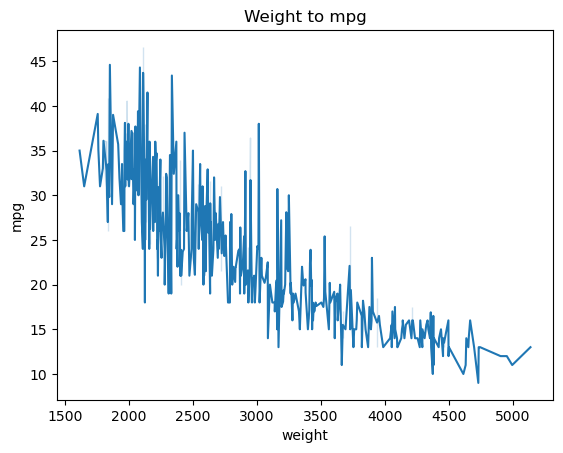

In [25]:
sns.lineplot(data=data1, x='weight', y='mpg')
plt.title('Weight to mpg')

There is a negative correlation between the weight and the mpg.

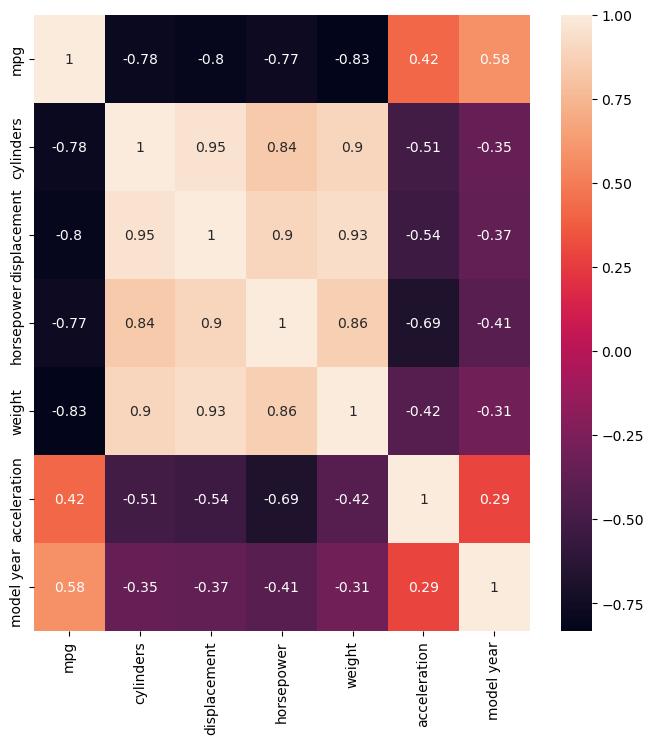

In [26]:
plt.figure(figsize = (8, 8))

sns.heatmap(data1.corr(), annot = True)

plt.show()

The 'mpg' variable exhibits a strong negative correlation with 'cylinders', 'displacement', 'horsepower', and 'weight'. There is a negative correlation between 'horsepower' and 'acceleration'. 'Weight' shows a strong positive correlation with 'horsepower', 'displacement', and 'cylinders'. Additionally, there is a positive correlation between 'model year' and 'mpg'.

**Observations:
The dataset primarily features models from 1970 to 1980, encompassing 4th, 6th, and 8th cylinder vehicles. Key correlations observed are:
A positive correlation between the number of cylinders and horsepower.
A negative correlation between acceleration time (0-60mph) and horsepower.
A positive correlation between the model year and miles per gallon (mpg).
A positive correlation between the year, vehicle weight, and acceleration.
A negative correlation between vehicle weight and mpg.
Additionally, the 'mpg' variable shows a strong negative correlation with 'cylinders', 'displacement', 'horsepower', and 'weight', whereas 'weight' is positively correlated with 'horsepower', 'displacement', and 'cylinders'. There's also a noted positive correlation between the 'model year' and 'mpg'.**

### **Scaling the data**

In [33]:
scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data1), columns = data1.columns)


In [34]:
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


## **Principal Component Analysis**

In [35]:

n = data_scaled.shape[1]


pca = PCA(n_components=n, random_state=1)


data_pca = pca.fit_transform(data_scaled)
data_pca1 = pd.DataFrame(data_pca)


exp_var = pca.explained_variance_ratio_

In [36]:
data_pca1.head()

,0,1,2,3,4,5,6
0,2.661556,0.918577,-0.558420,0.740000,-0.549433,-0.089079,-0.118566
1,3.523307,0.789779,-0.670658,0.493223,-0.025134,0.203588,0.101518
2,2.998309,0.861604,-0.982108,0.715598,-0.281324,0.137351,-0.055167
3,2.937560,0.949168,-0.607196,0.531084,-0.272607,0.295916,-0.121296
4,2.930688,0.931822,-1.078890,0.558607,-0.543871,0.007707,-0.167301


In [37]:
exp_var

array([0.71476787, 0.1236554 , 0.10414042, 0.02671968, 0.01778617,
       0.00790889, 0.00502158])

Seven components or features are ranked in descending order based on the amount of variance they contribute.

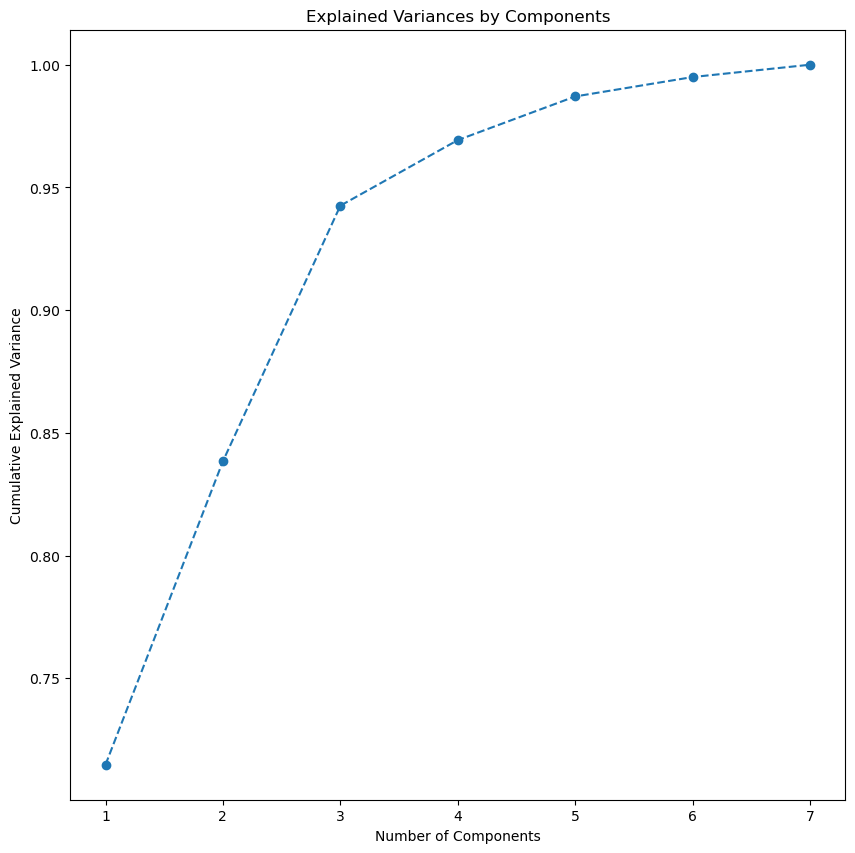

In [54]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 8), exp_var.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [55]:
sum = 0

for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.90):
        print("Number of PCs that explain at least 90% variance:", ix + 1)
        break

Number of PCs that explain at least 90% variance: 3


**Observations:Number of PCs that explain at least 90% variance:3**

In [40]:
pc_comps = ['PC1', 'PC2', 'PC3']

data_pca = pd.DataFrame(np.round(pca.components_[:3,:], 2), index = pc_comps, columns = data_scaled.columns)

data_pca.T

,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.02,0.89
model year,-0.23,-0.91,-0.02


#### **Interpret the coefficients of the first three principal components from the below DataFrame**

In [41]:
def color_high(val):
    if val <= -0.40:
        return 'background: pink'
    
    elif val >= 0.40:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


**Observations:
In the PCA analysis of the data, the first principal component (PC1) primarily represents a contrast between vehicle power/size characteristics (high positive loadings for 'cylinders', 'displacement', 'horsepower', 'weight') and efficiency/technology characteristics ('mpg', 'acceleration', 'model year' with negative loadings). PC2 is strongly influenced by 'model year', indicating it captures variance related to the age or era of vehicles. PC3 is dominated by 'acceleration', focusing on vehicle acceleration characteristics.**

#### **Visualize the data in 2 dimensions using the first two principal components**



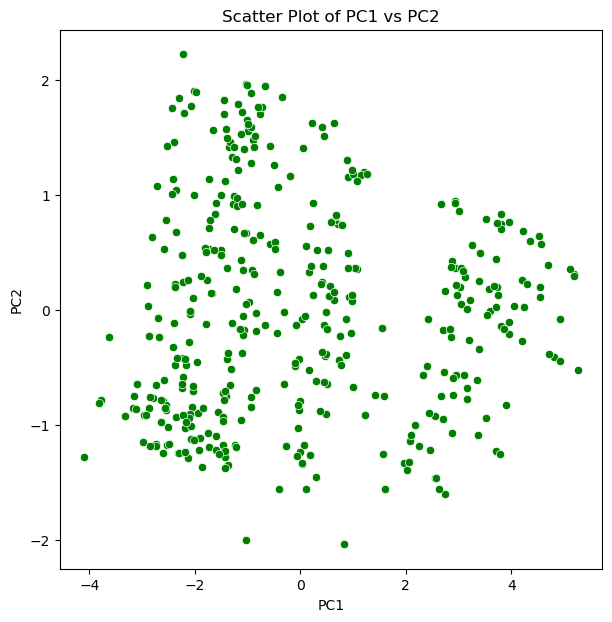

In [63]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x=df_concat[0], y=df_concat[1],color='green')  
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter Plot of PC1 vs PC2")
plt.show()

In [58]:
df_concat = pd.concat([data1, data_pca1], axis=1)


In [59]:
df_concat

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,0,1,2,3,4,5,6
0,18.0,8,307.0,130.0,3504,12.0,70,2.661556,0.918577,-0.558420,0.740000,-0.549433,-0.089079,-0.118566
1,15.0,8,350.0,165.0,3693,11.5,70,3.523307,0.789779,-0.670658,0.493223,-0.025134,0.203588,0.101518
2,18.0,8,318.0,150.0,3436,11.0,70,2.998309,0.861604,-0.982108,0.715598,-0.281324,0.137351,-0.055167
3,16.0,8,304.0,150.0,3433,12.0,70,2.937560,0.949168,-0.607196,0.531084,-0.272607,0.295916,-0.121296
4,17.0,8,302.0,140.0,3449,10.5,70,2.930688,0.931822,-1.078890,0.558607,-0.543871,0.007707,-0.167301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,-1.420970,-1.225252,-0.286402,-0.671666,0.054472,-0.187878,0.101922
394,44.0,4,97.0,52.0,2130,24.6,82,-4.094686,-1.279998,1.960384,1.375464,0.740606,0.175097,0.087391
395,32.0,4,135.0,84.0,2295,11.6,82,-1.547254,-1.252540,-1.906999,-0.323768,-0.255922,-0.254531,0.149028
396,28.0,4,120.0,79.0,2625,18.6,82,-2.022942,-1.132137,0.609384,-0.464327,0.186656,0.089169,0.075018


## **t-SNE**

In [43]:
n_components = 2  
random_state = 1
learning_rate = 300

tsne = TSNE(n_components=n_components, random_state=random_state, learning_rate=learning_rate)

data_tsne = tsne.fit_transform(data_scaled)

In [44]:
data_tsne.shape

(398, 2)

In [45]:
data_tsne

array([[-3.44301949e+01, -1.75764713e+01],
       [-3.39027290e+01, -1.96455536e+01],
       [-3.44980736e+01, -1.86568356e+01],
       [-3.41299210e+01, -1.81328564e+01],
       [-3.47894478e+01, -1.83622284e+01],
       [-3.21016426e+01, -2.54868031e+01],
       [-3.20965919e+01, -2.64249802e+01],
       [-3.23477173e+01, -2.62426872e+01],
       [-3.17055702e+01, -2.61979923e+01],
       [-3.33171844e+01, -2.54707088e+01],
       [-3.45740471e+01, -2.04141388e+01],
       [-3.54633217e+01, -2.02584133e+01],
       [-3.49814339e+01, -2.01802406e+01],
       [-3.32940559e+01, -2.66711388e+01],
       [ 1.20098000e+01,  1.82792091e+01],
       [-1.09243717e+01,  6.04234743e+00],
       [-1.05968618e+01,  5.73707104e+00],
       [-1.09047670e+01,  6.44539070e+00],
       [ 1.26173925e+01,  1.93191013e+01],
       [ 1.97862911e+01,  1.82992363e+01],
       [ 1.54244757e+01,  1.84590263e+01],
       [ 1.17520771e+01,  1.86166706e+01],
       [ 1.54950933e+01,  1.82579174e+01],
       [ 1.

In [46]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [47]:
data_tsne.head()

,Component 1,Component 2
0,-34.430195,-17.576471
1,-33.902729,-19.645554
2,-34.498074,-18.656836
3,-34.129921,-18.132856
4,-34.789448,-18.362228


**Observations:All the points have negative values for both components**

#### **Visualize the clusters w.r.t different variables using scatter plot and box plot**

<Axes: xlabel='Component 1', ylabel='Component 2'>

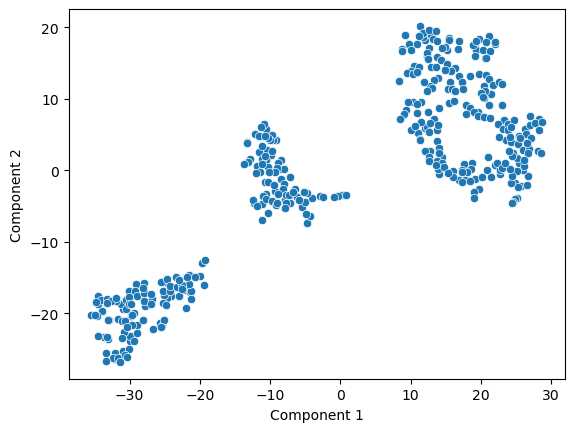

In [48]:
sns.scatterplot(x='Component 1', y='Component 2', data=data_tsne)


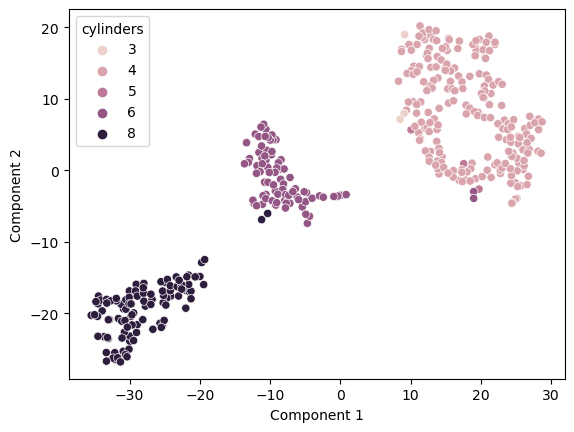

In [49]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data1.cylinders)

plt.show()

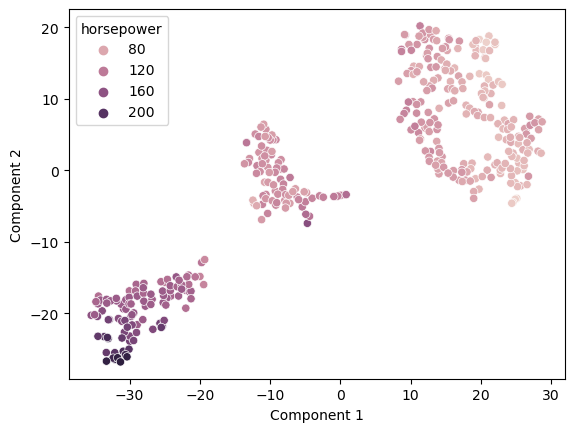

In [50]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data1.horsepower)

plt.show()

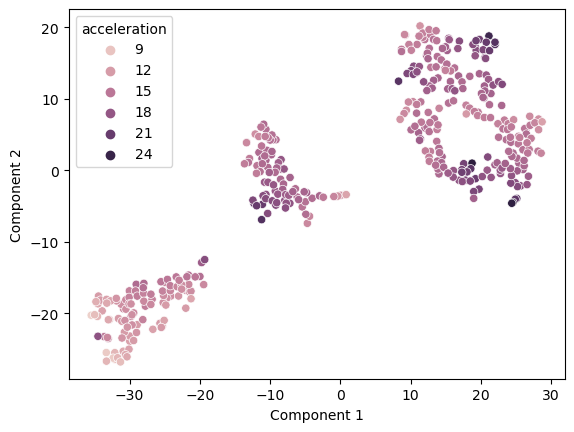

In [51]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data1.acceleration)

plt.show()

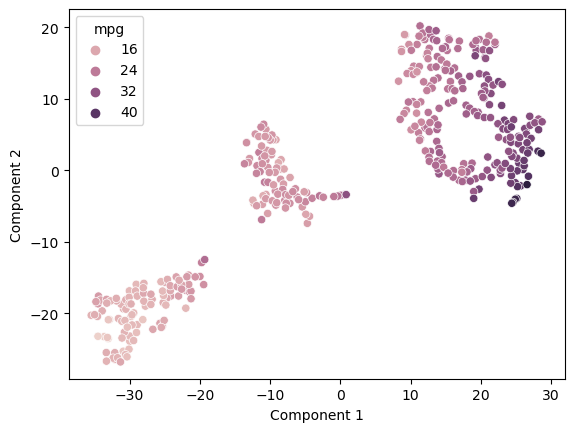

In [52]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data1.mpg)

plt.show()

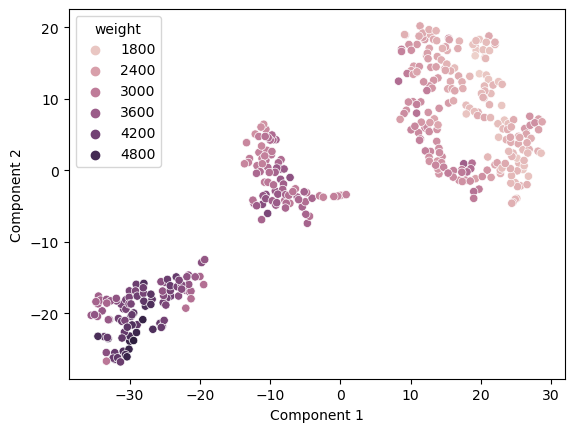

In [53]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data1.weight)

plt.show()

**Observations:
The scatter plot from the t-SNE output visualizes the high-dimensional data in a two-dimensional space with Component 1 and Component 2 as the axes. Observing the plot, we can identify three apparent groupings of data points:
Lower Left Grouping: A cluster of points located in the lower left quadrant, showing a collection of data points that are similar to each other based on the t-SNE transformation.
Upper Grouping: A dense cluster in the upper part of the plot, which seems to be relatively separate from the other points, indicating a distinct group within the data.
Lower Right Grouping: Another cluster in the lower right quadrant, also indicating a grouping of similar data points.**

## **Actionable Insights and Recommendations**

1) Craft targeted marketing campaigns highlighting the unique features of each vintage car cluster, like power for high horsepower cars and efficiency for models with better mpg.

2) Build detailed profiles for buyers of each car segment to personalize sales strategies and customer interactions.

3) Adjust pricing strategies to reflect vehicle attributes, with premium pricing for powerful cars and competitive pricing for fuel-efficient ones.

4) Inform purchasing with data insights, focusing on acquiring cars that align with specific market segments.

5) Enhance operational efficiency by synchronizing inventory, sales, and promotions with the insights from car clustering.

6) Train sales teams using analysis insights to effectively communicate the value of different vintage car types.

7) Develop an online platform to feature segmented vintage cars.

8) Partner with car clubs and forums to market segmented vintage cars to collectors and enthusiasts.

9) Utilize predictive analytics to anticipate demand for various car clusters, optimizing inventory levels.

10) Provide customized services for each car segment to enhance appeal and add value.

11) Leverage data insights operationally to strengthen SecondLife's market position and attract a broad range of buyers, securing a data-driven competitive advantage.
